# Init

In [2]:
# Standard python libraries
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import torch

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Global Settings

In [3]:
N_THREADS = 16
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 300
TARGET_NAME = 'TARGET'

In [6]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

# Loading Data

In [4]:
!ls -al v1

total 24964
drwxrwxr-x 2 dmdp dmdp     4096 дек 23 02:25 .
drwxrwxr-x 5 dmdp dmdp     4096 янв 13 22:58 ..
-rw-rw-r-- 1 dmdp dmdp 25554897 дек 23 02:50 train.csv


In [5]:
DATASET_DIR = '../v1/'
DATASET_NAME = 'train.zip'
DATASET_FULLNAME = os.path.join(DATASET_DIR, DATASET_NAME)

In [8]:
df = pd.read_csv('v1/train.zip', low_memory=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114708 entries, 0 to 114707
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  114708 non-null  int64  
 1   id                          114708 non-null  int64  
 2   client_income               114708 non-null  float64
 3   car_owned                   111327 non-null  float64
 4   bike_owned                  111290 non-null  float64
 5   active_loan                 111272 non-null  float64
 6   house_own                   111260 non-null  float64
 7   child_count                 111288 non-null  float64
 8   credit_amount               114708 non-null  float64
 9   loan_annuity                110192 non-null  object 
 10  accompany_client            113082 non-null  object 
 11  client_income_type          111229 non-null  object 
 12  client_education            111284 non-null  object 
 13  client_marital

In [11]:
TARGET_NAME = 'default'

# Model

In [12]:
tr_data, te_data = train_test_split(
    df,
    test_size=TEST_SIZE,
    stratify=df[TARGET_NAME],
    random_state=RANDOM_STATE
)

print(f'Data splitted. Parts sizes: tr_data = {tr_data.shape}, te_data = {te_data.shape}')

tr_data.head()

Data splitted. Parts sizes: tr_data = (91766, 41), te_data = (22942, 41)


,Unnamed: 0,id,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,...,client_permanent_match_tag,client_contact_work_tag,type_organization,score_source_1,score_source_2,score_source_3,social_circle_default,phone_change,credit_bureau,default
13688,14526,12200102,13500.0,0.0,1.0,0.0,0.0,0.0,36000.0,1292.85,...,Yes,Yes,Bank,0.565305,0.588832,0.520897599,0.0619,2091.0,1.0,0
111366,118286,12206125,11250.0,1.0,1.0,0.0,1.0,2.0,27000.0,1350,...,Yes,Yes,Business Entity Type 3,0.305495,0.058675,0.641368257,NaN,1562.0,5.0,0
1964,2081,12160603,19350.0,0.0,0.0,0.0,1.0,0.0,100692.0,4006.35,...,Yes,No,Industry: type 4,NaN,0.635256,0.634705531,NaN,854.0,3.0,0
60169,63943,12101214,27000.0,0.0,0.0,0.0,0.0,0.0,81900.0,2394.45,...,Yes,No,Other,0.667300,0.631661,NaN,NaN,2055.0,1.0,0
52392,55709,12220021,13500.0,0.0,1.0,0.0,1.0,2.0,28887.3,1671.3,...,Yes,Yes,Industry: type 5,0.355784,0.197175,0.474051289,NaN,0.0,NaN,0


In [13]:
task = Task('binary')

In [14]:
roles = {
    'target': TARGET_NAME,
}

In [15]:
TIMEOUT = 3600*12

In [16]:
automl = TabularAutoML(
    task = task,
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
)

In [17]:
%%time
oof_pred = automl.fit_predict(tr_data, roles = roles, verbose = 1)

[23:03:56] Stdout logging level is INFO.
[23:03:56] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[23:03:56] Task: binary

[23:03:56] Start automl preset with listed constraints:
[23:03:56] - time: 43200.00 seconds
[23:03:56] - CPU: 16 cores
[23:03:56] - memory: 16 GB

[23:03:56] Train data shape: (91766, 41)



/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transf

[23:03:59] Layer 1 train process start. Time left 43196.96 secs


/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))


[23:04:01] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[23:04:10] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.7485829875172112
[23:04:10] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[23:04:10] Time left 43185.43 secs



/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transf

[23:04:16] Selector_LightGBM fitting and predicting completed
[23:04:19] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transf

[23:04:32] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.7640681014210339
[23:04:32] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[23:04:32] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
[23:09:36] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
[23:09:36] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
[23:09:50] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = 0.7613310471470298
[23:09:50] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed
[23:09:50] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


[23:09:58] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.7567715836695224
[23:09:58] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed
[23:09:58] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric perio

[23:14:06] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
[23:14:06] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


[23:14:23] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.7606748165848414
[23:14:23] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed
[23:14:23] Time left 42573.15 secs

[23:14:23] Layer 1 training completed.

[23:14:23] Blending: optimization starts with equal weights and score 0.7664223862128519
[23:14:23] Blending: iteration 0: score = 0.7683809987684764, weights = [0.         0.30139464 0.40215516 0.10530237 0.19114779]
[23:14:24] Blending: iteration 1: score = 0.7683965625660678, weights = [0.         0.34001952 0.37961152 0.09315348 0.18721549]
[23:14:24] Blending: iteration 2: score = 0.7683986402362158, weights = [0.         0.33833313 0.37717593 0.08569961 0.19879134]
[23:14:25] Blending: iteration 3: score = 0.7684006055352512, weights = [0.         0.33739555 0.38303417 0.07943106 0.20013921]
[23:14:25] Blending: iteration 4: score = 0.7684005441694661, weights = [0.         0.33739552 0.38303417 0.07943106 0.2001392 ]
[23:14:25] Automl pres

In [18]:
%%time

te_pred = automl.predict(te_data)
print(f'Prediction for te_data:\n{te_pred}\nShape = {te_pred.shape}')

Prediction for te_data:
array([[0.04290034],
       [0.02302839],
       [0.02365136],
       ...,
       [0.02798818],
       [0.07502751],
       [0.01262945]], dtype=float32)
Shape = (22942, 1)
CPU times: user 6.91 s, sys: 9.65 ms, total: 6.92 s
Wall time: 755 ms


In [19]:
print(f'OOF score: {roc_auc_score(tr_data[TARGET_NAME].values, oof_pred.data[:, 0])}')
print(f'HOLDOUT score: {roc_auc_score(te_data[TARGET_NAME].values, te_pred.data[:, 0])}')

OOF score: 0.7684006095200424
HOLDOUT score: 0.7725676136091228


In [20]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 0.33740 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.38303 * (5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM) +
	 0.07943 * (5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.20014 * (5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 


In [21]:
RD = ReportDeco(output_path = 'tabularAutoML_model_report')

automl_rd = RD(
    TabularAutoML(
        task = task,
        timeout = TIMEOUT,
        cpu_limit = N_THREADS,
        reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
    )
)

In [22]:
%%time
oof_pred = automl_rd.fit_predict(tr_data, roles = roles, verbose = 1)

[23:14:26] Stdout logging level is INFO.
[23:14:26] Task: binary

[23:14:26] Start automl preset with listed constraints:
[23:14:26] - time: 43200.00 seconds
[23:14:26] - CPU: 16 cores
[23:14:26] - memory: 16 GB

[23:14:26] Train data shape: (91766, 41)



/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transf

[23:14:29] Layer 1 train process start. Time left 43196.81 secs


/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))


[23:14:32] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[23:14:41] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.7486195997790449
[23:14:41] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[23:14:41] Time left 43185.08 secs



/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transf

[23:14:47] Selector_LightGBM fitting and predicting completed
[23:14:49] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/transf

[23:15:04] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.7640681014210339
[23:15:04] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[23:15:04] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
[23:20:08] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
[23:20:08] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
[23:20:22] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = 0.7613310471470298
[23:20:22] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed
[23:20:22] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


[23:20:32] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.7569568079233716
[23:20:32] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed
[23:20:32] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric perio

[23:24:48] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
[23:24:48] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


[23:25:05] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.7603522421559543
[23:25:05] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed
[23:25:05] Time left 42561.66 secs

[23:25:05] Layer 1 training completed.

[23:25:05] Blending: optimization starts with equal weights and score 0.7662452996996552
[23:25:05] Blending: iteration 0: score = 0.7682006598686766, weights = [0.         0.2955976  0.41754013 0.1003293  0.18653299]
[23:25:06] Blending: iteration 1: score = 0.768227663204935, weights = [0.         0.3481708  0.38805068 0.09225584 0.17152272]
[23:25:06] Blending: iteration 2: score = 0.768227663204935, weights = [0.         0.3481708  0.38805068 0.09225584 0.17152272]
[23:25:06] Blending: no score update. Terminated

[23:25:06] Automl preset training completed in 640.01 seconds

[23:25:06] Model description:
Final prediction for new objects (level 0) = 
	 0.34817 * (5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.38805 * (5 averaged models 

/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/report/report_deco.py:146: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/home/dmdp/workspace/envs/automl/lib/python3.9/site-packages/lightautoml/report/report_deco.py:153: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


CPU times: user 1h 38min 5s, sys: 2min 27s, total: 1h 40min 33s
Wall time: 10min 42s


CPU times: user 51.4 ms, sys: 47.9 ms, total: 99.3 ms
Wall time: 52.4 ms


<AxesSubplot: xlabel='Feature'>

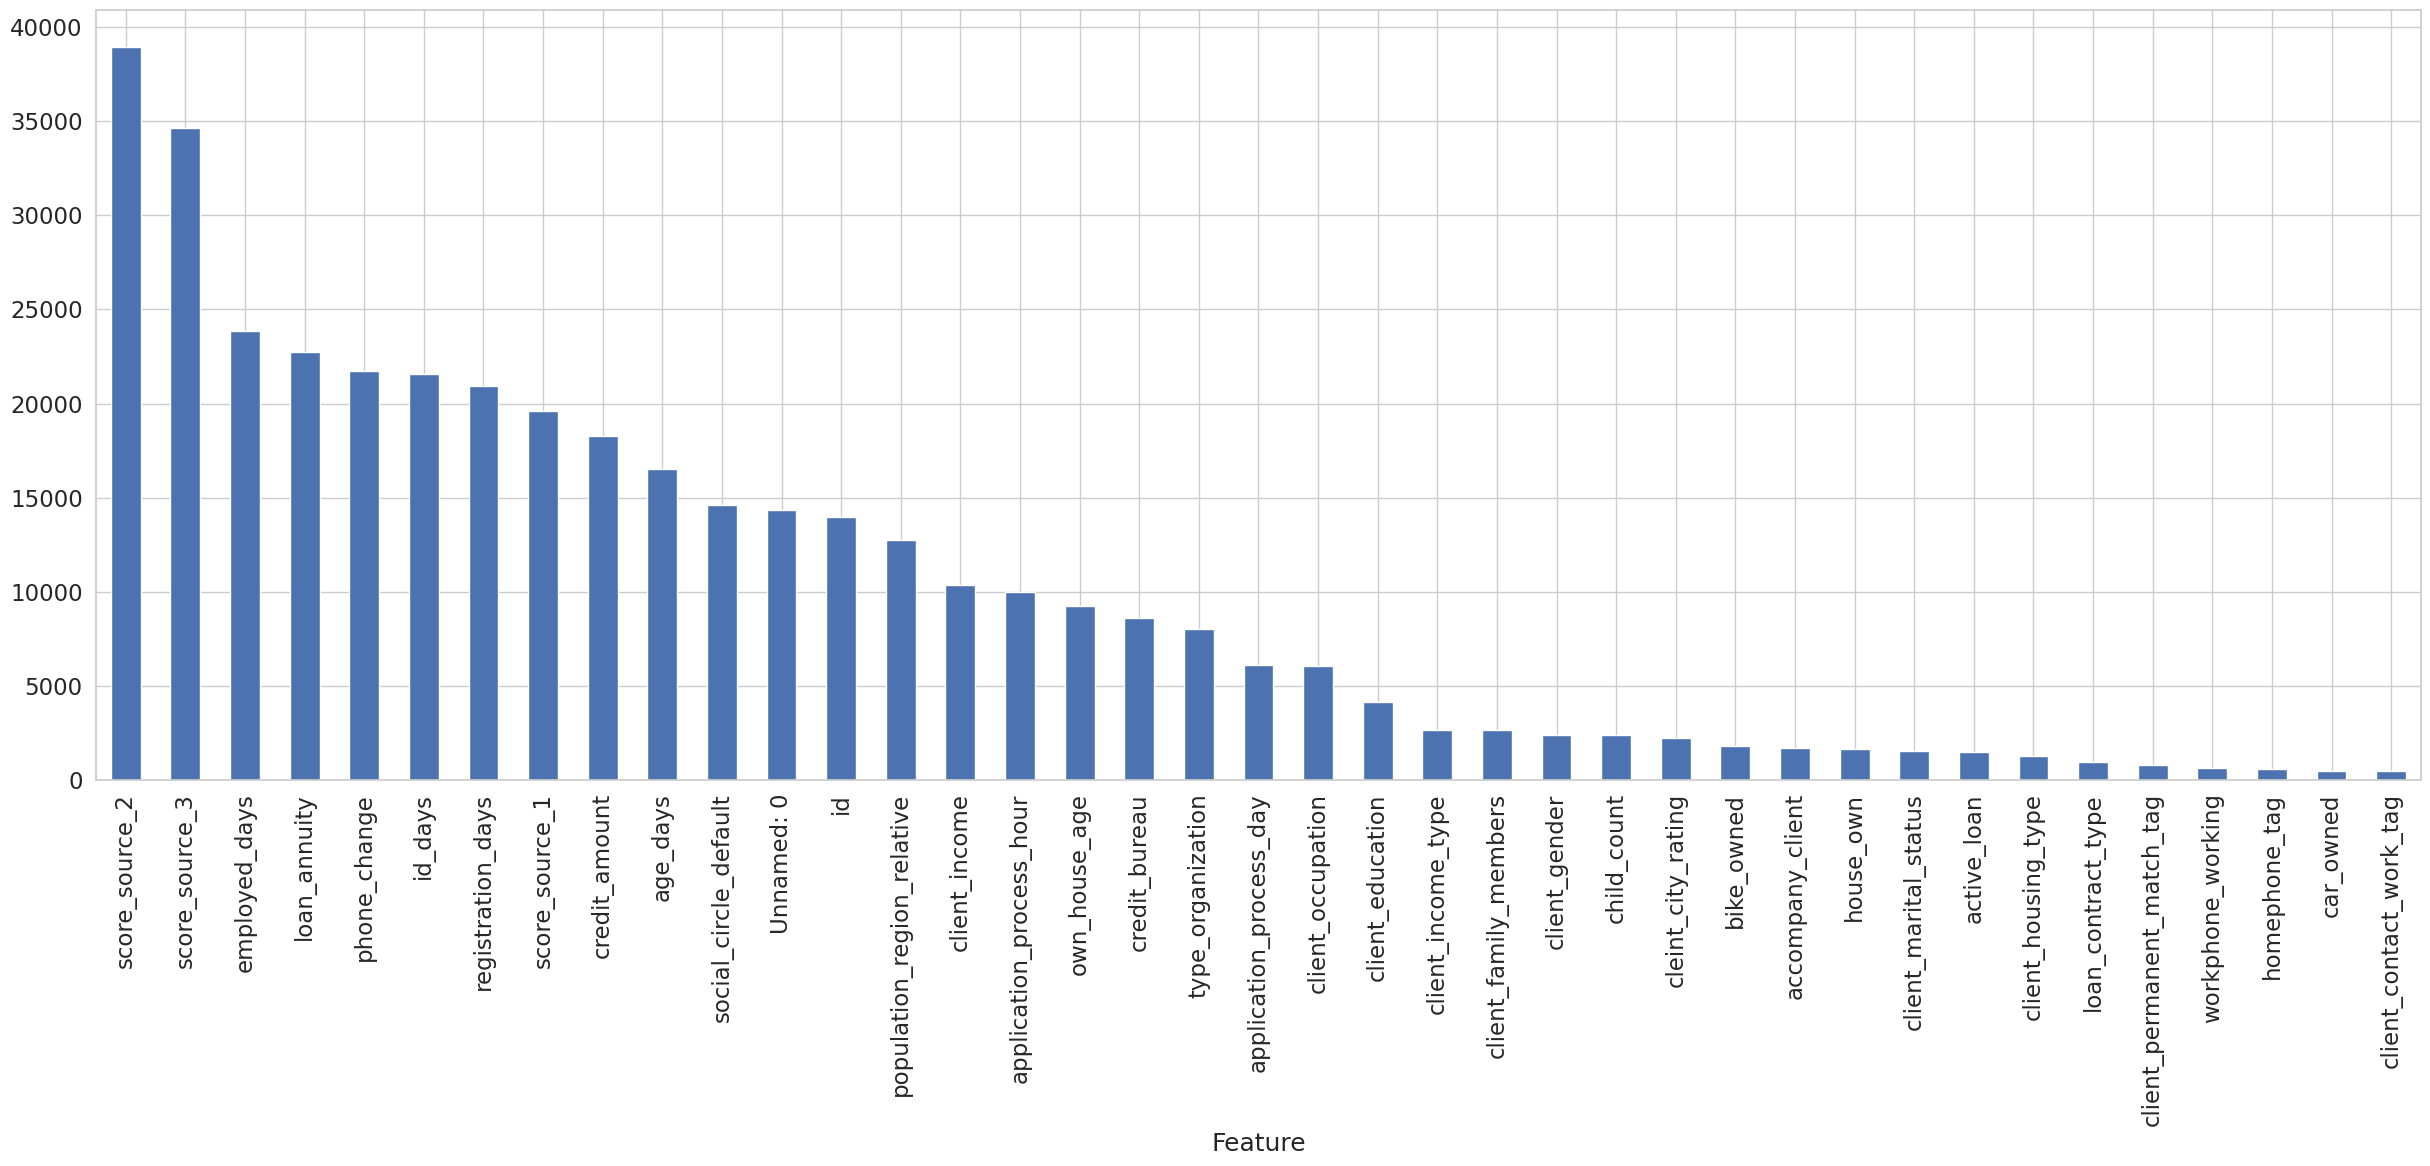

In [23]:
%%time

# Fast feature importances calculation
fast_fi = automl_rd.model.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [24]:
%%time

# Accurate feature importances calculation (Permutation importances) -  can take long time to calculate
accurate_fi = automl_rd.model.get_feature_scores('accurate', te_data, silent = False)

CPU times: user 4min 27s, sys: 905 ms, total: 4min 28s
Wall time: 29.9 s


<AxesSubplot: xlabel='Feature'>

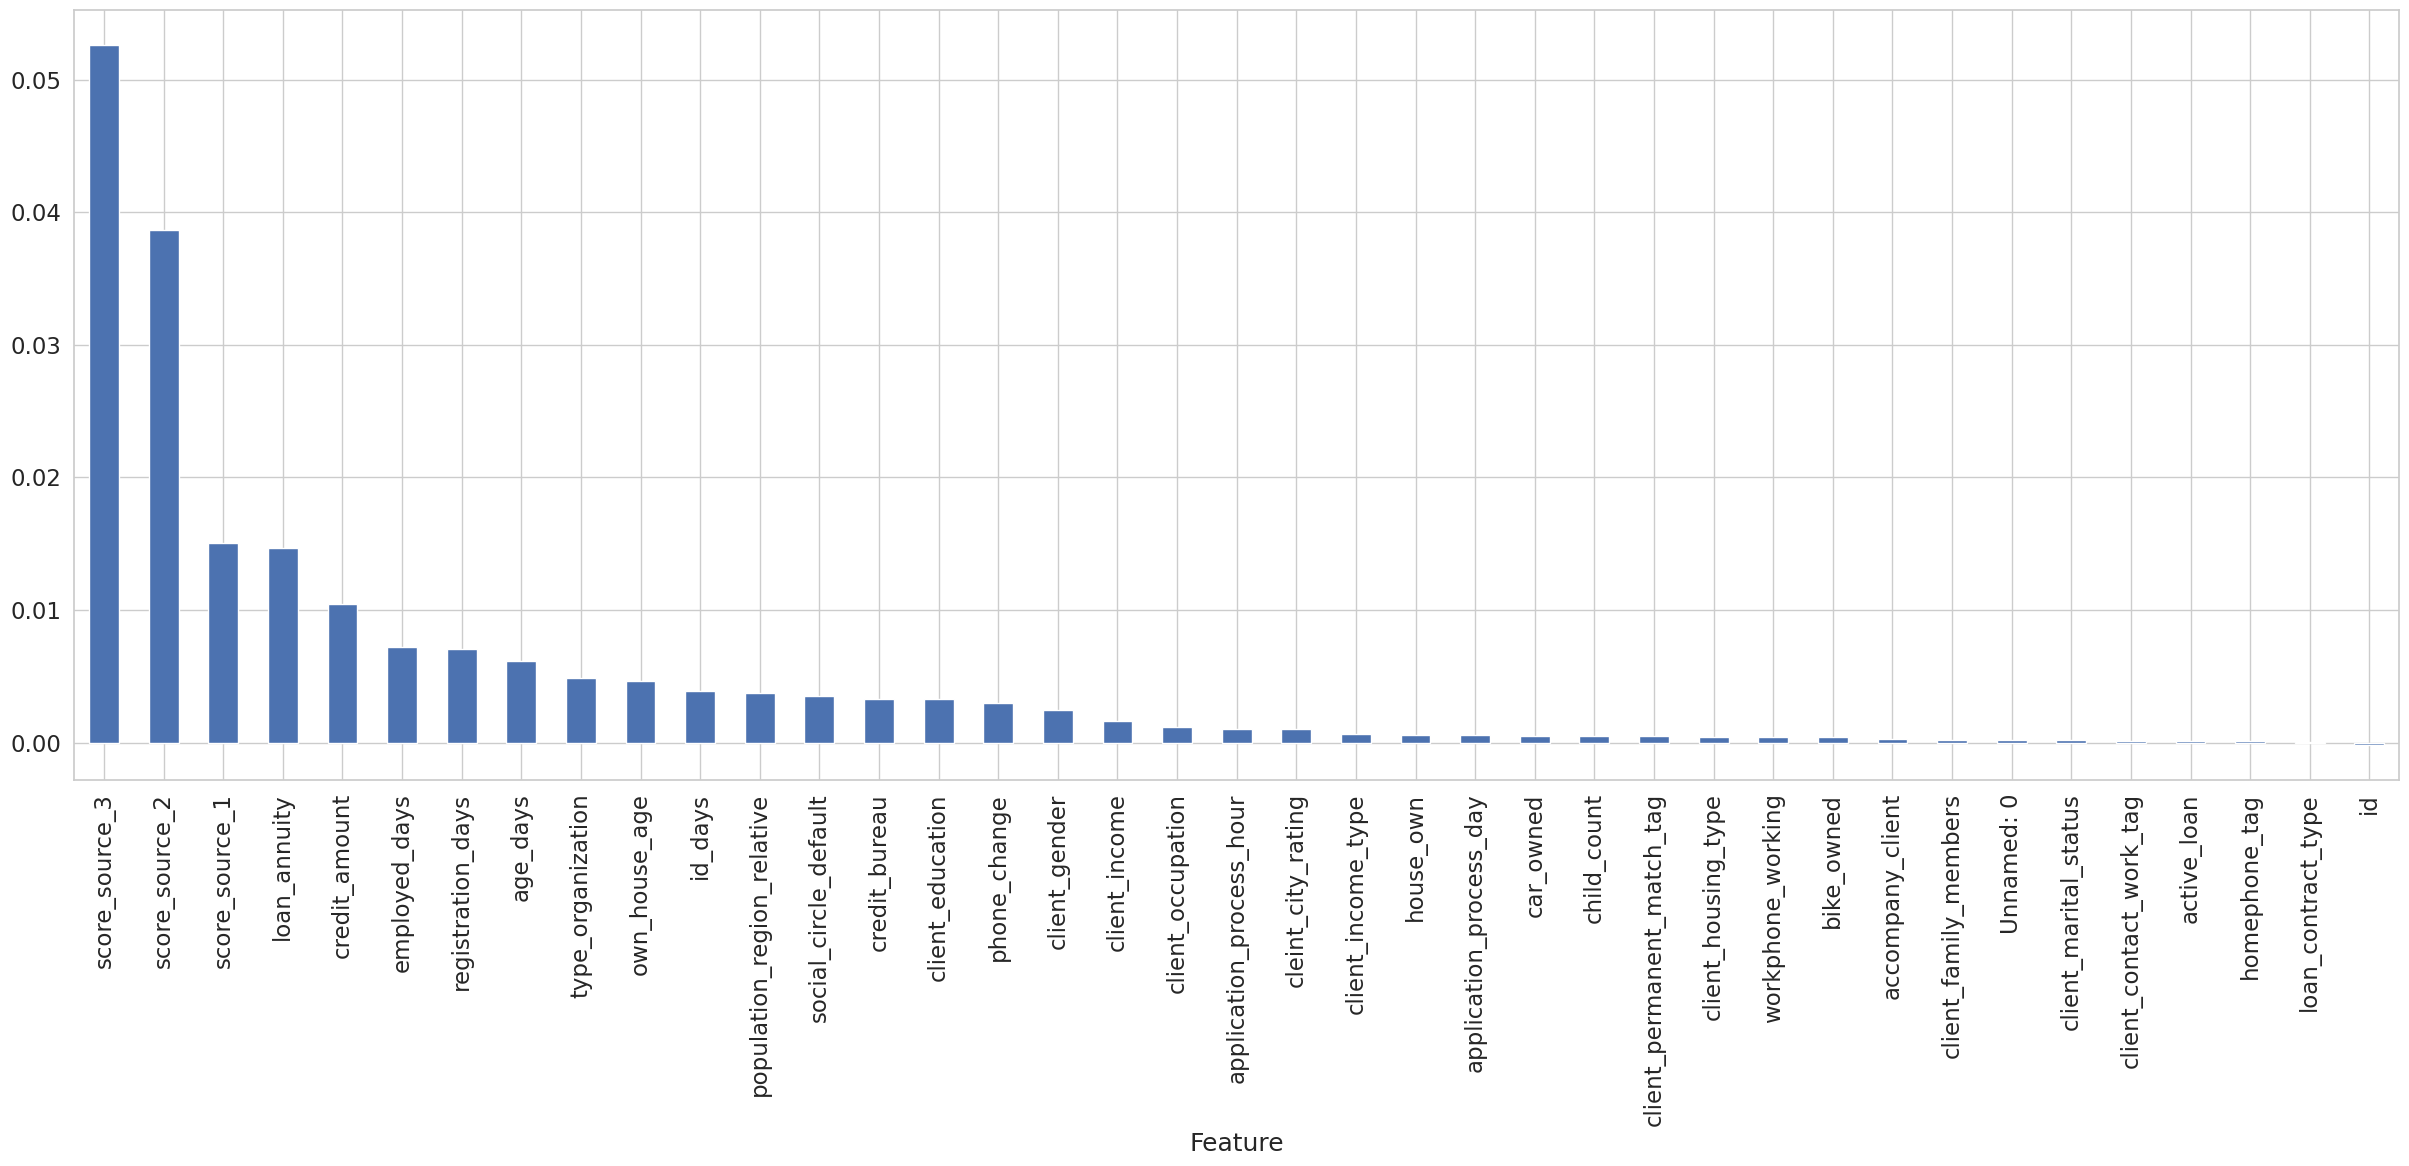

In [25]:
accurate_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)